# Notebook for feature engineering II

In [53]:
%load_ext autoreload
%autoreload 2

#Imports
import pandas as pd
import requests
import os
from tqdm.notebook import tqdm
import pickle
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  ift6758.data.data_acquisition import Season
from ift6758.visualizations.simple_visualization import Utilities 

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# season2015 = Season(2015,"../ift6758/data")
# season2016 = Season(2016,"../ift6758/data")
# season2017 = Season(2017,"../ift6758/data")
# season2018 = Season(2018,"../ift6758/data")
# season2019 = Season(2019,"../ift6758/data")

In [55]:
# df_2015 = season2015.clean_data()
# df_2016 = season2016.clean_data()
# df_2017 = season2017.clean_data()
# df_2018 = season2018.clean_data()
# df_2019 = season2019.clean_data()

In [73]:
from ift6758.features.feature_engineering2 import SeasonDataSetTwo
years = [2015,2016,2017,2018]
test = [2017,2018]
data = SeasonDataSetTwo(test)

In [74]:
df = data.get_features_2()

File already Exists, loading from ../ift6758/data/PICKLE//2017.pkl
Len of games_list in 2017 is 1488
Saved new pickle with all events in ../ift6758/data/PICKLE//2017_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File with all events already Exists, loading from ../ift6758/data/PICKLE//2018_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


* Is goal (0 or 1)
* Empty Net (0 or 1; you can assume NaNs are 0)
* Game seconds
* Game period
* Coordinates (x,y, separate columns)
* Shot distance
* Shot angle
* Shot type
* Last event type
* Coordinates of the last event (x, y, separate columns)
* Time from the last event (seconds)
* Distance from the last event
* Rebound (bool): True if the last event was also a shot, otherwise False
* Change in shot angle; only include if the shot is a rebound, otherwise 0.
* “Speed”: defined as the distance from the previous event, divided by the time since the previous event. 

In [70]:
pd.set_option('display.max_columns', None)
df

,gamePk,team.name,gamePeriod,coordinatesX,coordinatesY,shotType,emptyNet,gameSeconds,shotDistance,shotAngle,isGoal,lastEventType,lastEventCoordinatesX,lastEventCoordinatesY,timeFromLastEvent,distanceFromLastEvent,rebound,speed,changeInShotAngle
0,2018020001,Montréal Canadiens,1,78.0,-19.0,Backhand,0,29.0,21.954498,59.931417,0,Faceoff,0.0,0.0,29.0,80.280757,False,2.768302,0.000000
1,2018020001,Toronto Maple Leafs,1,-37.0,-10.0,Snap Shot,0,49.0,52.952809,-10.885527,0,Shot,78.0,-19.0,20.0,115.351636,True,5.767582,70.816944
2,2018020001,Montréal Canadiens,1,47.0,-23.0,Wrist Shot,0,60.0,47.885280,28.705953,0,Shot,-37.0,-10.0,11.0,85.000000,True,7.727273,39.591480
3,2018020001,Montréal Canadiens,1,53.0,14.0,Snap Shot,0,234.0,38.626416,-21.250506,0,Missed Shot,73.0,22.0,5.0,21.540659,False,4.308132,0.000000
4,2018020001,Montréal Canadiens,1,77.0,-2.0,Snap Shot,0,246.0,12.165525,9.462322,0,Missed Shot,81.0,-4.0,5.0,4.472136,False,0.894427,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85934,2018030417,St. Louis Blues,3,-77.0,7.0,Snap Shot,False,922.0,13.892444,30.256437,1,Giveaway,-57.0,34.0,31.0,33.600595,False,1.083890,0.000000
85935,2018030417,St. Louis Blues,3,-69.0,7.0,Snap Shot,0,951.0,21.189620,19.290046,0,Hit,-68.0,-29.0,12.0,36.013886,False,3.001157,0.000000
85936,2018030417,St. Louis Blues,3,-65.0,-4.0,Snap Shot,0,955.0,24.331050,-9.462322,0,Shot,-69.0,7.0,4.0,11.704700,True,2.926175,28.752368
85937,2018030417,Boston Bruins,3,42.0,3.0,Wrist Shot,0,1010.0,47.095647,-3.652223,0,Stoppage,NaN,NaN,0.0,NaN,False,NaN,0.000000


In [62]:
df['result.emptyNet'].unique()

array([0, True], dtype=object)

<AxesSubplot:xlabel='shotType', ylabel='count'>

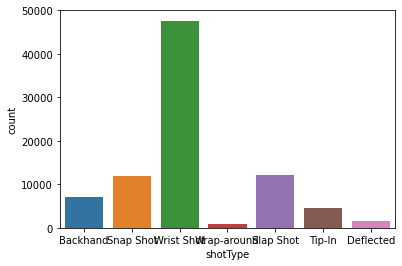

In [72]:
sns.countplot(x='shotType',data=df)